# COMP8038 - Computational Intelligence I Exam<br><small>Appendix: Case 02. Artificial Bee Colony Algorithm<br>2340081121 / Nicholas Dominic<br>BINUS University Graduate Program</small>

In [1]:
from beecolpy import abc
from numpy import array
from matplotlib.pyplot import scatter, legend, figure, title, tight_layout as tl, savefig

In [2]:
help(abc)

Help on class abc in module beecolpy.beecolpy:

class abc(builtins.object)
 |  abc(function, boundaries, colony_size: int = 40, scouts: float = 0.5, iterations: int = 50, min_max: str = 'min', nan_protection: bool = True, log_agents: bool = True)
 |  
 |  Class that applies Artificial Bee Colony (ABC) algorithm to find 
 |  minimum or maximum of a function that's receive a vector of floats 
 |  as input and returns a float as output.
 |  
 |  https://en.wikipedia.org/wiki/Artificial_bee_colony_algorithm
 |  
 |  Parameters
 |  ----------
 |  function : Name
 |      A name of a function to minimize/maximize.
 |      Example: if the function is:
 |          def my_func(x): return x[0]**2 + x[1]**2 + 5*x[1]
 |          
 |          Use "my_func" as parameter.
 |  
 |  
 |  boundaries : List of Tuples
 |      A list of tuples containing the lower and upper boundaries of 
 |      each dimension of function domain.
 |      
 |      Obs.: The number of boundaries determines the dimension of 


In [3]:
def rosenbrock_function(data):
    # data is in form of [x, y]
    return (100 * (data[1]-(data[0]**2))**2) + (1-data[0])**2

In [4]:
def fit(colony_size=100, sct=.5, it=50):
    # register the function and set the function boundaries to (-10 <= x <= 10 and -10 <= y <= 10)
    abc_obj = abc(rosenbrock_function, [(-10, 10), (-10, 10)], colony_size=colony_size, scouts=sct, iterations=it)
    return colony_size, it, abc_obj.fit() # execute the algorithm

## Experiment with swarm size (to get the best params)

In [5]:
glob_minimum = []
for i in range(50, 500+1, 50):
    glob_minimum.append(fit(colony_size=i))

In [6]:
glob_minimum

[(50, 50, [1.1048037001064313, 1.2159364607256844]),
 (100, 50, [1.1522961167479167, 1.3292476500049093]),
 (150, 50, [1.0278774154301886, 1.05888353879942]),
 (200, 50, [0.9682353522648852, 0.9397526840976684]),
 (250, 50, [1.0193536920146808, 1.039851819362318]),
 (300, 50, [0.9577733023590277, 0.9184142367696292]),
 (350, 50, [0.9372129607343125, 0.8825180804947638]),
 (400, 50, [0.9894682429086911, 0.9793707503560212]),
 (450, 50, [1.018733899403995, 1.040187385045782]),
 (500, 50, [1.0314339612355257, 1.0623868480717036])]

In [7]:
best_colony = 0
total_solution_colony = float('inf')

for i in glob_minimum:
    if i[2][0]+i[2][1] < total_solution_colony:
        total_solution_colony = i[2][0]+i[2][1]
        best_colony = i[0]

In [8]:
best_colony

350

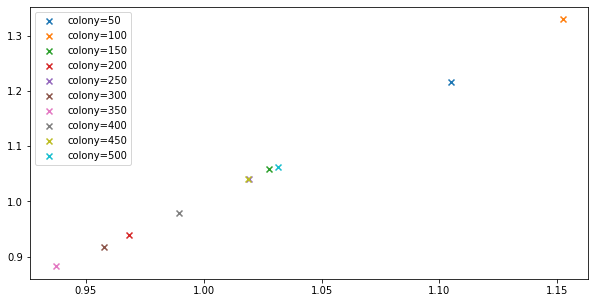

In [9]:
fig = figure(figsize=(10, 5))
for i, j, k in glob_minimum:
    scatter(k[0], k[1], marker="x", label="colony={}".format(i))
    legend(loc='best')

## Experiment with number of iterations (to get the best params)

In [10]:
glob_minimum_it = []
for i in range(100, 550, 50):
    glob_minimum_it.append(fit(it=i))

In [11]:
glob_minimum_it

[(100, 100, [0.9729830885411223, 0.9374810727762005]),
 (100, 150, [0.9985645555088051, 1.0004921636560316]),
 (100, 200, [0.9947672655834991, 0.9953989507184655]),
 (100, 250, [0.9099924251679267, 0.8314782953472276]),
 (100, 300, [0.9770176520264491, 0.9559863816850859]),
 (100, 350, [0.9712684654180875, 0.9444934821288167]),
 (100, 400, [1.0032888861508547, 1.0041889510229438]),
 (100, 450, [1.0214309754829478, 1.0431459982670044]),
 (100, 500, [1.0390007890223192, 1.0787455139386792])]

In [12]:
best_iter = 0
total_solution_iter = float('inf')

for i in glob_minimum_it:
    if i[2][0]+i[2][1] < total_solution_iter:
        total_solution_iter = i[2][0]+i[2][1]
        best_iter = i[1]

In [13]:
best_iter

250

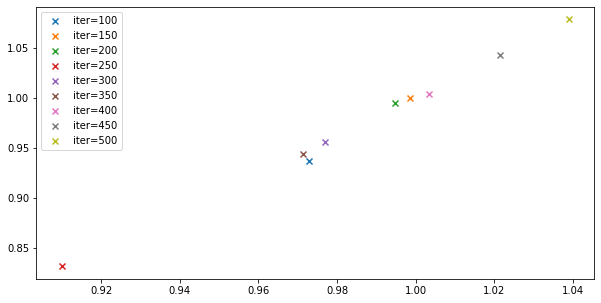

In [14]:
fig2 = figure(figsize=(10, 5))
for i, j, k in glob_minimum_it:
    scatter(k[0], k[1], marker="x", label="iter={}".format(j))
    legend(loc='best')

## The ABC Algorithm with the best params

In [15]:
abc_obj = abc(rosenbrock_function, [(-10, 10), (-10, 10)], colony_size=best_colony, scouts=.5, iterations=best_iter)
abc_obj.fit() #Execute the algorithm

[0.9552808032442879, 0.9133407038377975]

In [16]:
# get the obtained solution after execute the fit() method
abc_obj.get_solution()

[0.9552808032442879, 0.9133407038377975]

In [17]:
# get number of times that scout event occur
abc_obj.get_status()[1]

119

In [18]:
# get a list with position of all points (food sources) used in each iteration
food = abc_obj.get_agents()

In [19]:
selected_num_of_iter = list(range(0, len(food), int((len(food))/14)))

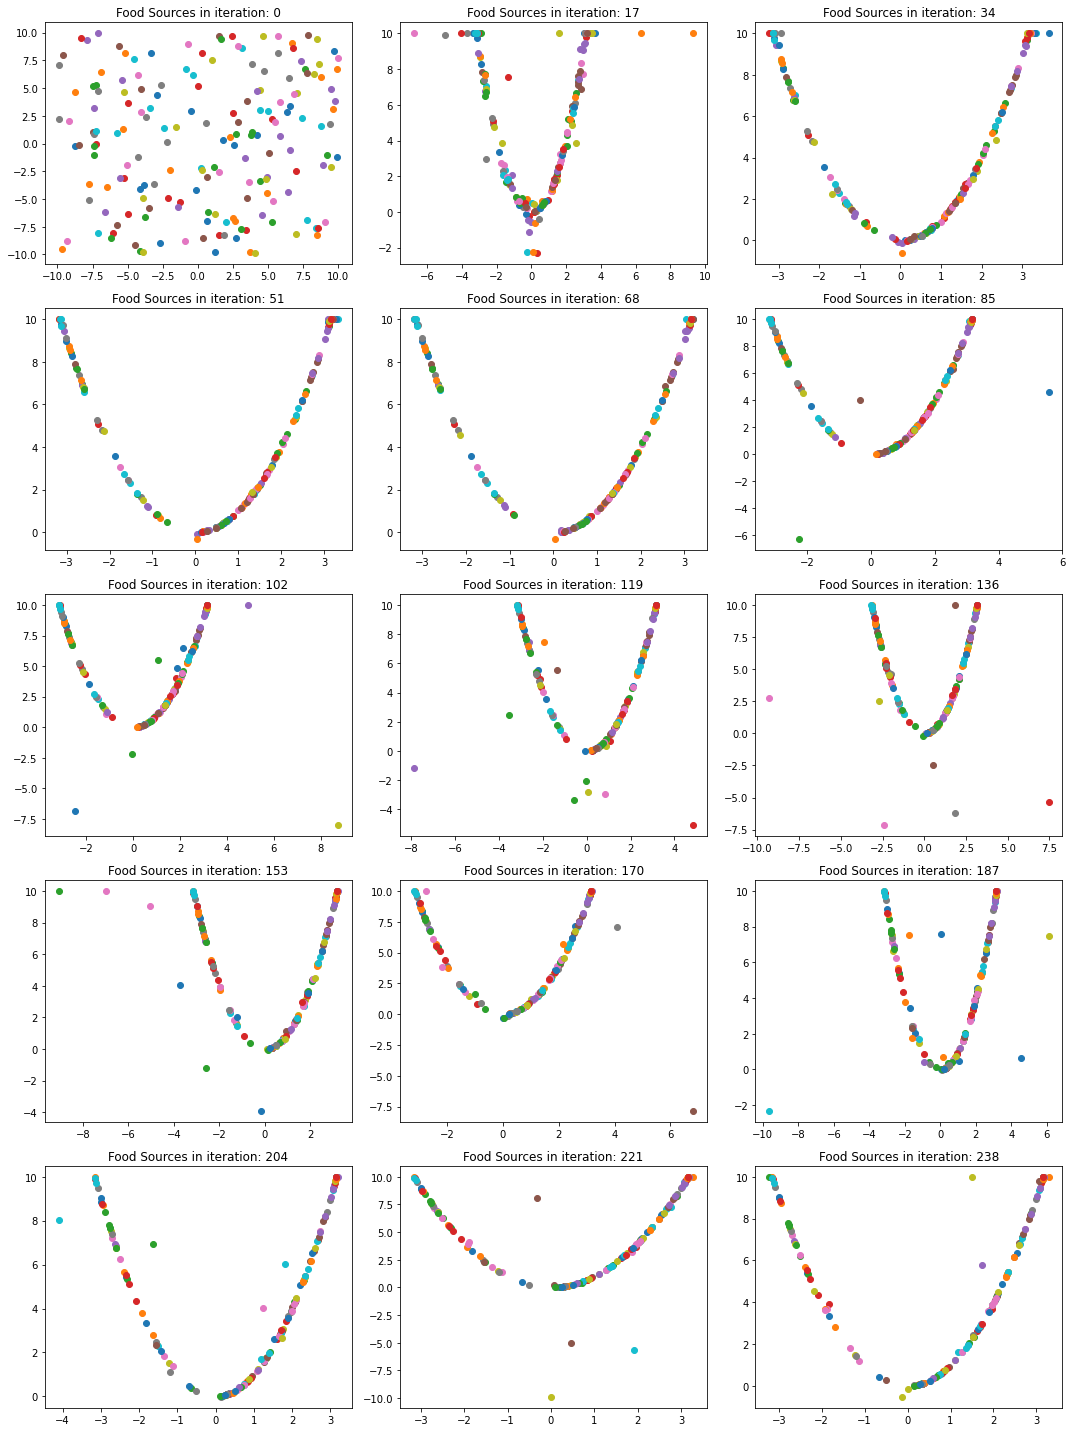

In [20]:
fig3 = figure(figsize=(15, 20))
for a, b in enumerate(selected_num_of_iter):
    x = fig3.add_subplot(5, 3, a+1) # position index always starts from 1, thus i+1
    for i in food[b]:
        scatter(i[0], i[1])
        title("Food Sources in iteration: {}".format(b))
tl() # margin is adjusted
savefig("abc_food_resource.png") # save figure